In [5]:
'''Data Wrangling II 
Create an “Academic performance” dataset of students and perform the following operations using 
Python. 
 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution.
'''

'Data Wrangling II \nCreate an “Academic performance” dataset of students and perform the following operations using \nPython. \n \n1. Scan all variables for missing values and inconsistencies. If there are missing values and/or \ninconsistencies, use any of the suitable techniques to deal with them. \n2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques \nto deal with them. \n3. Apply data transformations on at least one of the variables. The purpose of this \ntransformation should be one of the following reasons: to change the scale for better \nunderstanding of the variable, to convert a non-linear relation into a linear one, or to decrease \nthe skewness and convert the distribution into a normal distribution.\n'

In [6]:
# Assignment 2 // Rohan Kaitake TE ai&ds 22 B
"C:\Users\rohan\OneDrive\Documents\TE\Data Science Lab\Assignment2\Academic-Performance-Dataset.csv"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''pandas: For handling and analyzing structured data easily.
numpy: For numerical computations and working with arrays and matrices efficiently.
matplotlib: For creating static, interactive, and animated visualizations in Python.
seaborn: For creating attractive and informative statistical graphics with ease.'''

'pandas: For handling and analyzing structured data easily.\nnumpy: For numerical computations and working with arrays and matrices efficiently.\nmatplotlib: For creating static, interactive, and animated visualizations in Python.\nseaborn: For creating attractive and informative statistical graphics with ease.'

In [8]:
# Load the dataset
df = pd.read_csv('C:\\Users\\rohan\\OneDrive\\Documents\\TE\Data Science Lab\\Assignment2\\Academic-Performance-Dataset.csv')

In [9]:
df

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.0,98.0,63.0,89.0,36.0,368,73.6
1,2,Reyansh,M,IT,58.0,62.0,83.0,83.0,88.0,34.0,350,70.0
2,3,Aarav,M,IT,57.0,-20.0,100.0,NaN,56.0,36.0,192,38.4
3,4,Atharv,M,IT,60.0,89.0,83.0,70.0,33.0,23.0,298,59.6
4,5,Vivaan,M,Comp,85.0,90.0,NaN,78.0,23.0,56.0,247,49.4
5,6,Advik,M,ENTC,94.0,99.0,84.0,100.0,56.0,99.0,438,87.6
6,7,Ansh,M,ENTC,98.0,88.0,95.0,81.0,78.0,78.0,420,84.0
7,8,Ishaan,M,ENTC,75.0,66.0,51.0,83.0,-99.0,76.0,192,38.4
8,9,Dhruv,M,ENTC,63.0,NaN,NaN,97.0,56.0,55.0,208,41.6
9,10,Siddharth,M,ENTC,96.0,67.0,78.0,95.0,NaN,98.0,338,67.6


In [10]:
# 1. Scan all variables for missing values and inconsistencies
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Rollno         0
Name           2
Gender         0
Branch         0
Attendence     0
Phy_marks      1
Che_marks      3
EM1_marks      2
PPS_marks      1
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64


In [11]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['Name', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks']

Fill the missing value using mean for float and int datatypes and for other forword fill

In [12]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,36.0,368,73.6
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,34.0,350,70.0
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,36.0,192,38.4
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,23.0,298,59.6
4,5,Vivaan,M,Comp,85.0,90.000000,80.764706,78.000000,23.000000,56.0,247,49.4
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,99.0,438,87.6
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,78.0,420,84.0
7,8,Ishaan,M,ENTC,75.0,66.000000,51.000000,83.000000,69.611111,76.0,192,38.4
8,9,Dhruv,M,ENTC,63.0,74.058824,80.764706,97.000000,56.000000,55.0,208,41.6
9,10,Siddharth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.611111,98.0,338,67.6


Correction in Total Marks, Percentage after filling missing value

In [13]:
df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
df['Percentage']=df['Total Marks']/5

df

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,36.0,348.000000,69.600000
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,34.0,350.000000,70.000000
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,36.0,349.503268,69.900654
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,23.0,298.000000,59.600000
4,5,Vivaan,M,Comp,85.0,90.000000,80.764706,78.000000,23.000000,56.0,327.764706,65.552941
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,99.0,438.000000,87.600000
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,78.0,420.000000,84.000000
7,8,Ishaan,M,ENTC,75.0,66.000000,51.000000,83.000000,69.611111,76.0,345.611111,69.122222
8,9,Dhruv,M,ENTC,63.0,74.058824,80.764706,97.000000,56.000000,55.0,362.823529,72.564706
9,10,Siddharth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.611111,98.0,407.611111,81.522222


# Outliers Detection


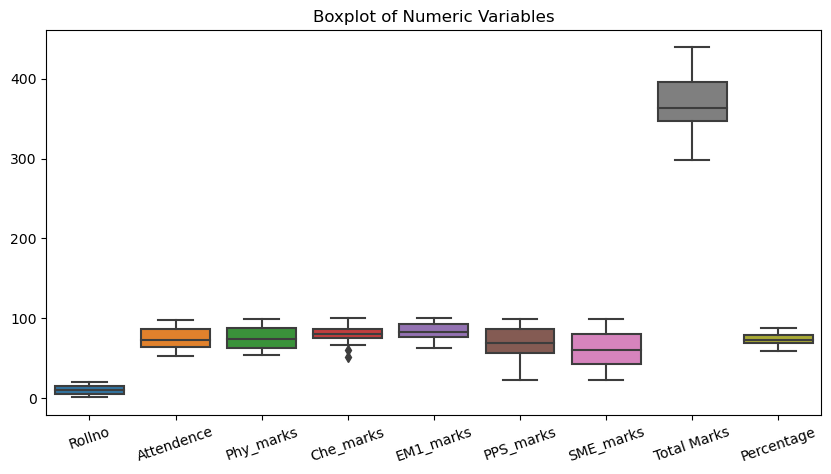

In [18]:
numeric_variables = df.select_dtypes(include=np.number)

# Plot boxplots to visualize outliers
plt.figure(figsize=(10,5 ))
sns.boxplot(data=numeric_variables)
plt.title("Boxplot of Numeric Variables")
plt.xticks(rotation=19)
plt.show()

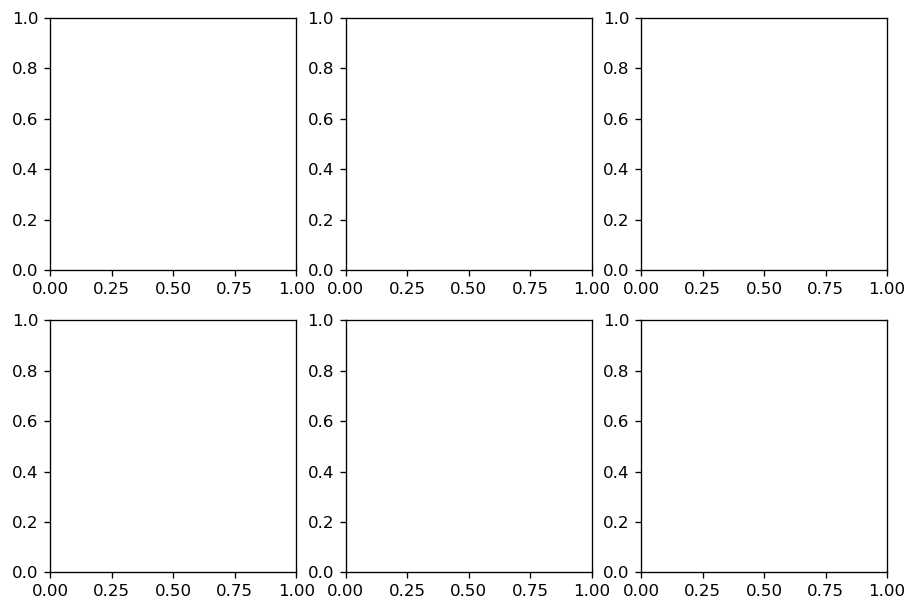

In [19]:
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

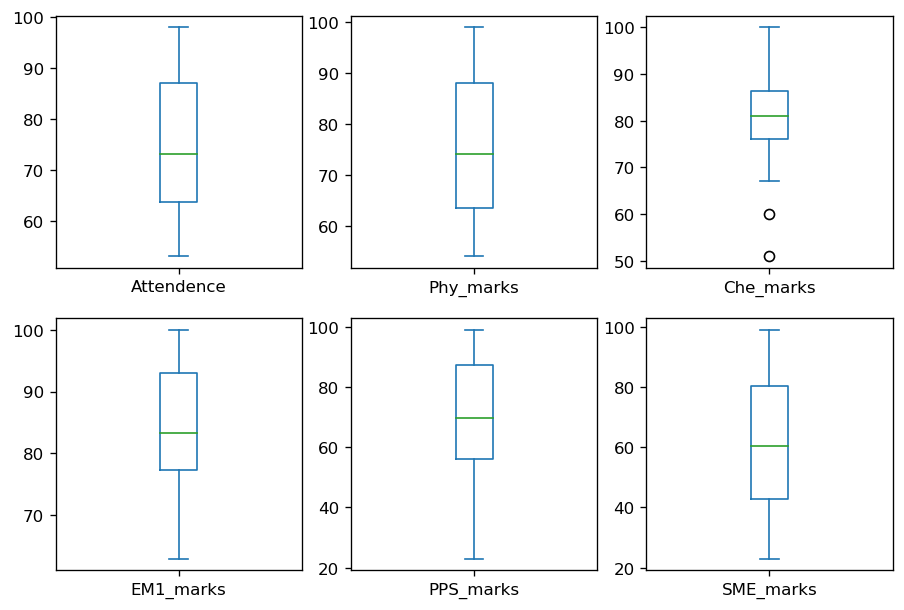

In [20]:
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

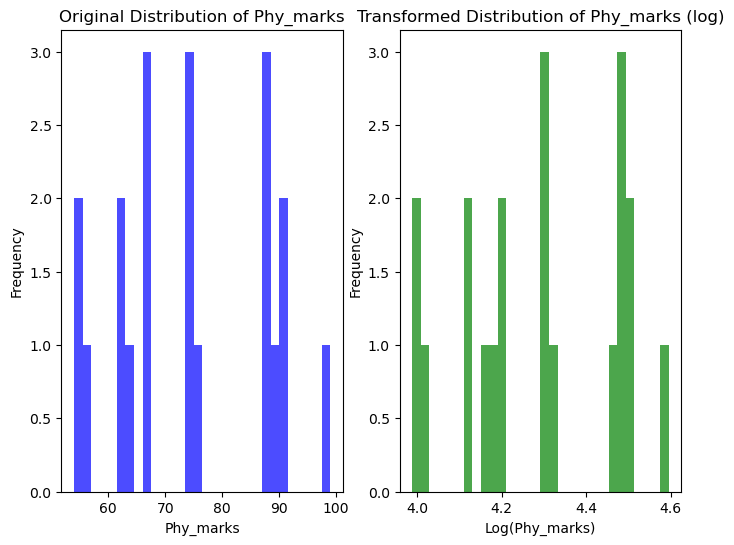

TypeError: 'NoneType' object is not callable

In [24]:

# 3. Apply data transformations on at least one variable
# Let's say we want to transform the 'Score' variable to decrease skewness and convert the distribution into a normal distribution
# We can use a log transformation
import numpy as np

# Apply logarithmic transformation to 'Phy_marks'
df['Phy_marks_log'] = np.log(df['Phy_marks'])

# Plot histograms to visualize the transformation
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Phy_marks'], bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution of Phy_marks')
plt.xlabel('Phy_marks')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df['Phy_marks_log'], bins=30, color='green', alpha=0.7)
plt.title('Transformed Distribution of Phy_marks (log)')
plt.xlabel('Log(Phy_marks)')
plt.ylabel('Frequency')
plt.show()("stogram of Transformed Score (Phy_marks)")
plt.show()

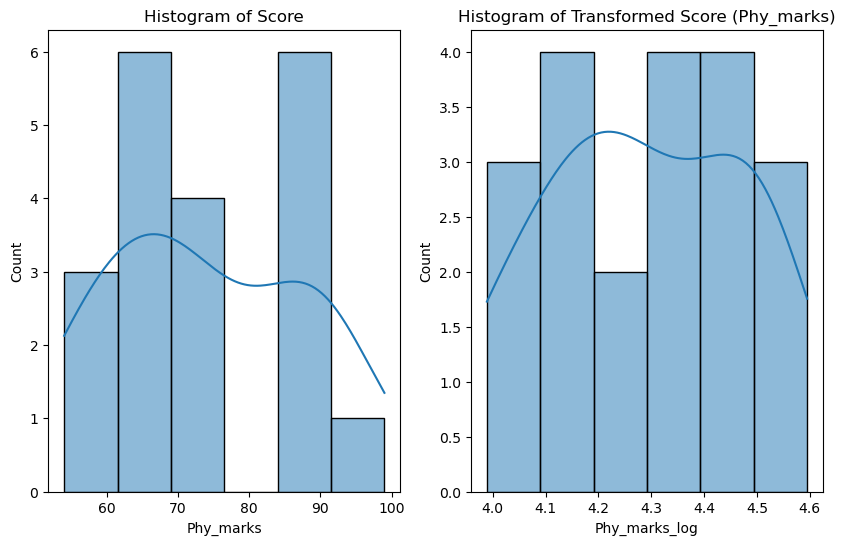

In [26]:
df['Phy_marks_log'] = np.log(df['Phy_marks'])

# Plot histograms to visualize the transformation
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Phy_marks'], kde=True)
plt.title("Histogram of Score")
plt.subplot(1, 2, 2)
sns.histplot(df['Phy_marks_log'], kde=True)
plt.title("Histogram of Transformed Score (Phy_marks)")
plt.show()